# 1:Which region generates the highest total purchase amount?

# 2:Which product category has the highest average spending score?

# 3:Is there any correlation between Annual Income and Purchase Amount?

# 4:Segment customers into groups based on Age and Spending Score (customer segmentation).

# 5:Find the top 10 customers who spent the most overall.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Time for lode the dataset
df=pd.read_csv("retail_dataset_50k.csv")
#checking
df.head()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Region,ProductCategory,PurchaseAmount,PurchaseDate
0,1,56,Male,34307,30,North,Electronics,1349,2020-01-01 00:00:00
1,2,69,Male,131195,74,South,Sports,326,2020-01-01 01:00:00
2,3,46,Male,44253,63,North,Groceries,959,2020-01-01 02:00:00
3,4,32,Male,127961,53,South,Groceries,1175,2020-01-01 03:00:00
4,5,60,Male,147649,11,East,Groceries,843,2020-01-01 04:00:00


In [8]:
df. describe()

,CustomerID,Age,AnnualIncome,SpendingScore,PurchaseAmount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,25000.500000,43.508260,84848.285560,50.04622,1007.095180
std,14433.901067,14.987668,37462.010116,28.62367,574.316901
min,1.000000,18.000000,20002.000000,1.00000,10.000000
25%,12500.750000,31.000000,52502.750000,25.00000,508.000000
50%,25000.500000,43.000000,84568.000000,50.00000,1008.000000
75%,37500.250000,56.000000,117433.750000,75.00000,1505.000000
max,50000.000000,69.000000,149997.000000,99.00000,1999.000000


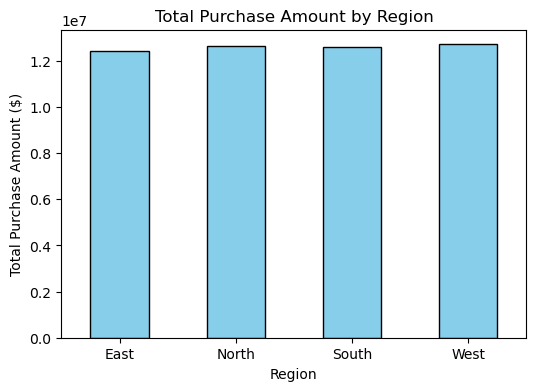

In [11]:
region_sales = df.groupby("Region")["PurchaseAmount"].sum()


plt.figure(figsize=(6,4))
region_sales.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Total Purchase Amount by Region")
plt.xlabel("Region")
plt.ylabel("Total Purchase Amount ($)")
plt.xticks(rotation=0) 
plt.show()

#Which product category has the highest average spending score?


ProductCategory
Electronics    50.731982
Beauty         50.092617
Groceries      49.921121
Clothing       49.753858
Sports         49.744555
Name: SpendingScore, dtype: float64
🏆 The product category with the highest average spending score is: {top_category} ({top_score:.2f})


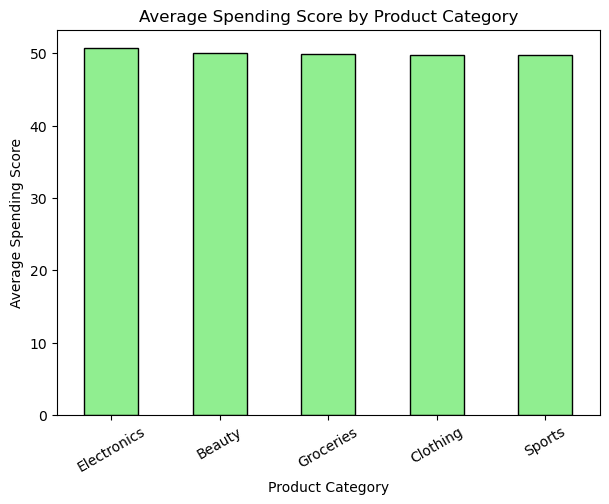

so it's little different between electric_beauty VS groceries_clothing_sports


In [14]:
category_spending = df.groupby("ProductCategory")["SpendingScore"].mean().sort_values(ascending=False)

print(category_spending)


top_category = category_spending.idxmax()
top_score = category_spending.max()

print("🏆 The product category with the highest average spending score is: {top_category} ({top_score:.2f})")

# Visualization
plt.figure(figsize=(7,5))
category_spending.plot(kind="bar", color="lightgreen", edgecolor="black")

plt.title("Average Spending Score by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=30)
plt.show()
print("so it's little different between electric_beauty VS groceries_clothing_sports")

#Is there any correlation between Annual Income and Purchase Amount?


🔎 Correlation between Annual Income and Purchase Amount: -0.00


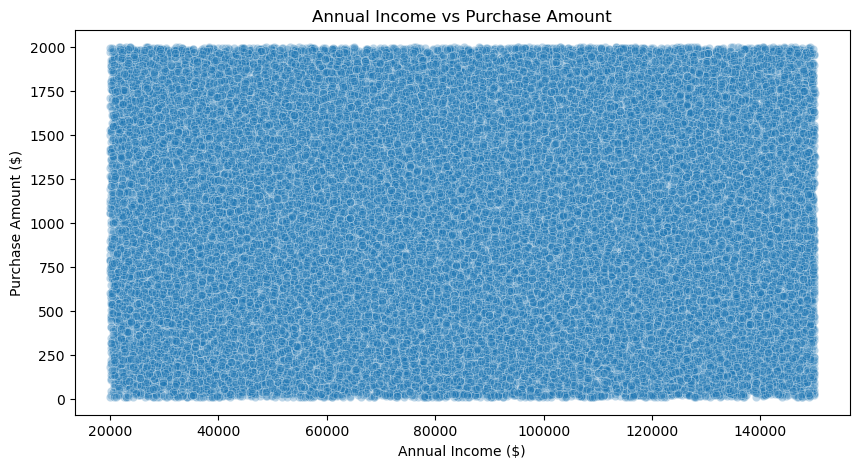

In [16]:
correlation = df["AnnualIncome"].corr(df["PurchaseAmount"])
print(f"🔎 Correlation between Annual Income and Purchase Amount: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x="AnnualIncome", y="PurchaseAmount", data=df, alpha=0.3)

plt.title("Annual Income vs Purchase Amount")
plt.xlabel("Annual Income ($)")
plt.ylabel("Purchase Amount ($)")
plt.show()

#Segment customers into groups based on Age and Spending Score (customer segmentation).


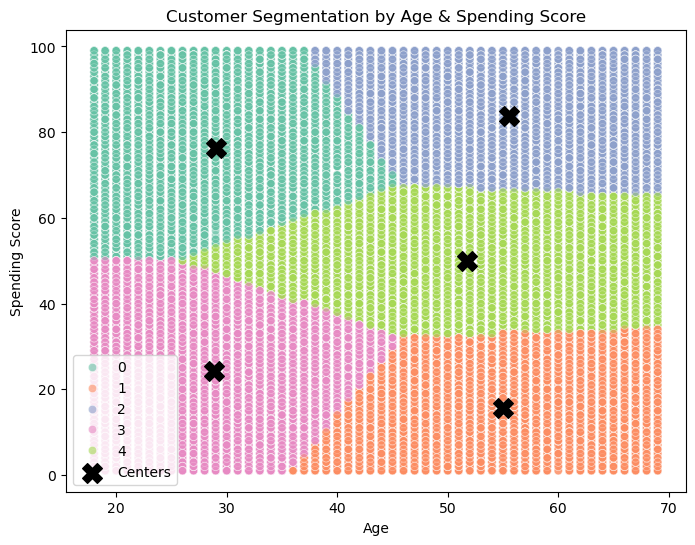

In [20]:
# Import the necessary libraries
from sklearn.cluster import KMeans  # Add this import for KMeans


X = df[["Age", "SpendingScore"]]

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Age", y="SpendingScore", 
    hue="Cluster", data=df, 
    palette="Set2", alpha=0.6
)

plt.scatter(centers[:,0], centers[:,1], c="black", s=200, marker="X", label="Centers")

plt.title("Customer Segmentation by Age & Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.show()